## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0,20)
print(X)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


In [3]:
a = -2
b = 1
y = a * X + b
print(y)

[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.67346939
 -23.48979592 -24.30612245 -25.12244898 -25.93877551 -26.75510204
 -27.57142857 -28.3877551  -29.20408163 -30.02040816 -30.83673469
 -31.65306122 -32.46938776 -33.28571429 -34.10204082 -34.91836735
 -35.73469388 -36.55102041 -37.36734694 -38.18367347 -39.        ]


#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [4]:
theta_0 = np.random.random()
theta_1 = np.random.random()
learning_rate = 0.001

In [5]:
def hypothesis(theta_0,theta_1,X):
    return theta_0 + theta_1*X


In [6]:
def cost_function(X,y,theta_0,theta_1):
    m = len(X)
    summation = 0
    for i in range (m):
        summation += ((theta_1 * X[i] + theta_0) - y[i])**2
    return summation /(2*m)

cost_output = cost_function(X,y,theta_0,theta_1)
print(cost_output)

391.9370751746312


In [7]:
def batch_gradient_descent(X,y,theta_0,theta_1,learning_rate):
    t0_deriv = 0
    t1_deriv = 0
    m = len(X)
    
    for i in range (m):
        t0_deriv = t0_deriv + (theta_1 * X[i] + theta_0) - y[i]
        t1_deriv = t1_deriv + ((theta_1 * X[i] + theta_0) - y[i])* X[i]
        
    theta_0 = theta_0 - learning_rate * (1/m) * t0_deriv
    theta_1 = theta_1 - learning_rate * (1/m) * t1_deriv
    
    return theta_0,theta_1

gradient_output = batch_gradient_descent(X,y,theta_0,theta_1,learning_rate)
print(gradient_output)

(0.25295724284721915, 0.14097000991285724)


In [8]:
def training(X, y, theta_0, theta_1, learning_rate, iters):
    cost_history = [0]
    t0_history = [0]
    t1_history = [0]
    y_predicted_history = [0]
    for i in range(iters):
        theta_0,theta_1 = batch_gradient_descent(X, y, theta_0, theta_1, learning_rate)
        t0_history.append(theta_0)
        t1_history.append(theta_1)
        cost = cost_function(X, y, theta_0, theta_1)
        cost_history.append(cost)
        y_predicted = hypothesis(theta_0,theta_1,X)
        y_predicted_history.append(y_predicted)
        if(cost < 0.01):
            break;
        print("iter={}, theta_0={}, theta_1={}, cost= {}".format(i, theta_0, theta_1, cost))
    return t0_history, t1_history, cost_history, y_predicted_history

training_output = training(X, y, theta_0, theta_1, learning_rate, 1000)

iter=0, theta_0=0.25295724284721915, theta_1=0.14097000991285724, cost= 292.98677964134737
iter=1, theta_0=0.23229458550524337, theta_1=-0.13993511487122434, cost= 219.0245923478018
iter=2, theta_0=0.21446164206845036, theta_1=-0.38279741260076505, cost= 163.74021490599156
iter=3, theta_0=0.19907515455238955, theta_1=-0.5927693163037955, cost= 122.41690156531979
iter=4, theta_0=0.18580377256087513, theta_1=-0.7743054252451347, cost= 91.52903608581983
iter=5, theta_0=0.17436102304076562, theta_1=-0.9312570179377253, cost= 68.44133335170028
iter=6, theta_0=0.1644992321971021, theta_1=-1.0669537645275415, cost= 51.18400222041155
iter=7, theta_0=0.1560042706101804, theta_1=-1.1842743722396805, cost= 38.28468696011327
iter=8, theta_0=0.14869101006196703, theta_1=-1.28570766276656, cost= 28.64284886177308
iter=9, theta_0=0.14239939567957066, theta_1=-1.3734053774741328, cost= 21.43587052126265
iter=10, theta_0=0.1369910500586324, theta_1=-1.4492278307915556, cost= 16.048871800316984
iter=11,

In [9]:
for i in range(len(training_output[3])):
    print("iter={}, hypothesis_output = {}".format(i, training_output[3][i]))


iter=0, hypothesis_output = 0
iter=1, hypothesis_output = [0.25295724 0.31049602 0.3680348  0.42557358 0.48311236 0.54065114
 0.59818992 0.6557287  0.71326748 0.77080626 0.82834504 0.88588382
 0.9434226  1.00096138 1.05850016 1.11603894 1.17357772 1.2311165
 1.28865527 1.34619405 1.40373283 1.46127161 1.51881039 1.57634917
 1.63388795 1.69142673 1.74896551 1.80650429 1.86404307 1.92158185
 1.97912063 2.03665941 2.09419819 2.15173697 2.20927575 2.26681453
 2.32435331 2.38189209 2.43943087 2.49696965 2.55450843 2.6120472
 2.66958598 2.72712476 2.78466354 2.84220232 2.8997411  2.95727988
 3.01481866 3.07235744]
iter=2, hypothesis_output = [ 0.23229459  0.17517821  0.11806184  0.06094547  0.00382909 -0.05328728
 -0.11040365 -0.16752003 -0.2246364  -0.28175278 -0.33886915 -0.39598552
 -0.4531019  -0.51021827 -0.56733464 -0.62445102 -0.68156739 -0.73868376
 -0.79580014 -0.85291651 -0.91003288 -0.96714926 -1.02426563 -1.081382
 -1.13849838 -1.19561475 -1.25273112 -1.3098475  -1.36696387 -1.42

In [10]:
last_theta_0 = training_output[0][-1]
last_theta_1 = training_output[1][-1]
print('optimum value of Theta_0: ',last_theta_0)
print('optimum value of Theta_1: ',last_theta_1)

y_predicted = hypothesis(last_theta_0,last_theta_1,X)
print('Best regression line: ',y_predicted)

optimum value of Theta_0:  0.302215035372568
optimum value of Theta_1:  -1.9480960415597672
Best regression line:  [  0.30221504  -0.49292621  -1.28806745  -2.08320869  -2.87834993
  -3.67349117  -4.46863241  -5.26377365  -6.0589149   -6.85405614
  -7.64919738  -8.44433862  -9.23947986 -10.0346211  -10.82976234
 -11.62490359 -12.42004483 -13.21518607 -14.01032731 -14.80546855
 -15.60060979 -16.39575104 -17.19089228 -17.98603352 -18.78117476
 -19.576316   -20.37145724 -21.16659848 -21.96173973 -22.75688097
 -23.55202221 -24.34716345 -25.14230469 -25.93744593 -26.73258717
 -27.52772842 -28.32286966 -29.1180109  -29.91315214 -30.70829338
 -31.50343462 -32.29857586 -33.09371711 -33.88885835 -34.68399959
 -35.47914083 -36.27428207 -37.06942331 -37.86456455 -38.6597058 ]


#### Try your function with any input parameterss of your choice.

#### Calculate r2 score

In [11]:
from sklearn.metrics import r2_score 

R_square = r2_score(y, y_predicted) 
print('Coefficient of Determination', R_square) 

Coefficient of Determination 0.9990962674750529


#### Plot loss vs. epochs

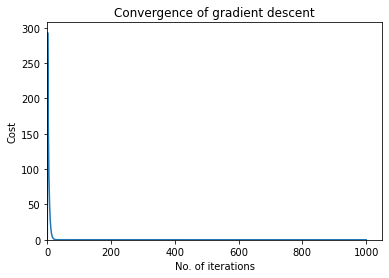

In [12]:
#Plot the cost function
plt.title('Convergence of gradient descent')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(training_output[2])
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

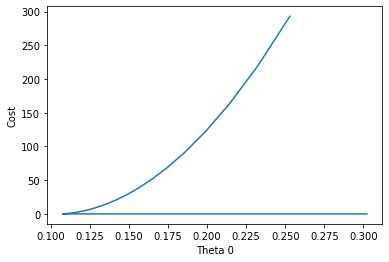

In [13]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 0')
plt.ylabel('Cost')
plt.plot(training_output[0][1:],training_output[2][1:])

plt.show()

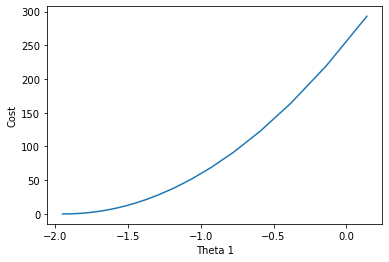

In [14]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 1')
plt.ylabel('Cost')
plt.plot(training_output[1][1:],training_output[2][1:])

plt.show()

#### Plot all regression lines till converge

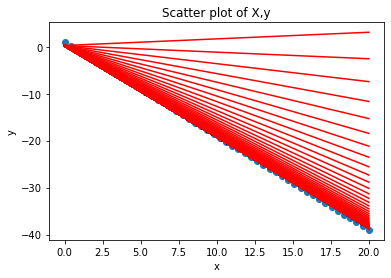

In [15]:
plt.scatter(X, y)
for i in range(1,len(training_output[3])):
    plt.plot(X, training_output[3][i], c='red')
plt.title('Scatter plot of X,y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Plot the best regression line

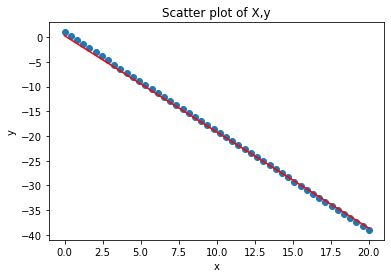

In [16]:
plt.scatter(X, y)
plt.plot(X, y_predicted, c='red')
plt.title('Scatter plot of X,y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [17]:
theta_0 = np.random.random()
theta_1 = np.random.random()
learning_rate = 0.001

In [18]:
training_output = training(X, y, theta_0, theta_1, 0.01, 2000)

iter=0, theta_0=0.6410363498507623, theta_1=-2.749097966430425, cost= 40.54500091422299
iter=1, theta_0=0.7195357829952972, theta_1=-1.7042125037745206, cost= 5.101952036835984
iter=2, theta_0=0.6927616755427962, theta_1=-2.0745737300512266, cost= 0.6508493442407435
iter=3, theta_0=0.7032914317924909, theta_1=-1.9434036489650786, cost= 0.09181390597259823
iter=4, theta_0=0.7005988823710738, theta_1=-1.9899646119056504, cost= 0.021556894319595274
iter=5, theta_0=0.7025893547379282, theta_1=-1.9735415534943308, cost= 0.012682492987506622
iter=6, theta_0=0.702917616539982, theta_1=-1.979438396506372, cost= 0.011516977221332996
iter=7, theta_0=0.7038322800252194, theta_1=-1.977425379192604, cost= 0.011319828932628421
iter=8, theta_0=0.7045364951442276, theta_1=-1.9782152393030472, cost= 0.011244551125404614
iter=9, theta_0=0.70531265412309, theta_1=-1.9780116277154063, cost= 0.011184836690239272
iter=10, theta_0=0.7060606903533997, theta_1=-1.9781598843681885, cost= 0.011127333920246197
it

In [19]:
for i in range(len(training_output[3])):
    print("iter={}, hypothesis_output = {}".format(i, training_output[3][i]))


iter=0, hypothesis_output = 0
iter=1, hypothesis_output = [  0.64103635  -0.48104445  -1.60312526  -2.72520606  -3.84728686
  -4.96936766  -6.09144847  -7.21352927  -8.33561007  -9.45769087
 -10.57977168 -11.70185248 -12.82393328 -13.94601408 -15.06809489
 -16.19017569 -17.31225649 -18.43433729 -19.5564181  -20.6784989
 -21.8005797  -22.92266051 -24.04474131 -25.16682211 -26.28890291
 -27.41098372 -28.53306452 -29.65514532 -30.77722612 -31.89930693
 -33.02138773 -34.14346853 -35.26554933 -36.38763014 -37.50971094
 -38.63179174 -39.75387254 -40.87595335 -41.99803415 -43.12011495
 -44.24219576 -45.36427656 -46.48635736 -47.60843816 -48.73051897
 -49.85259977 -50.97468057 -52.09676137 -53.21884218 -54.34092298]
iter=2, hypothesis_output = [ 7.19535783e-01  2.39388427e-02 -6.71658098e-01 -1.36725504e+00
 -2.06285198e+00 -2.75844892e+00 -3.45404586e+00 -4.14964280e+00
 -4.84523974e+00 -5.54083668e+00 -6.23643362e+00 -6.93203056e+00
 -7.62762750e+00 -8.32322444e+00 -9.01882138e+00 -9.7144183

In [20]:
last_theta_0 = training_output[0][-1]
last_theta_1 = training_output[1][-1]
print('optimum value of Theta_0: ',last_theta_0)
print('optimum value of Theta_1: ',last_theta_1)

y_predicted = hypothesis(last_theta_0,last_theta_1,X)
print('Best regression line: ',y_predicted)

optimum value of Theta_0:  0.7214759630025652
optimum value of Theta_1:  -1.9792822993131627
Best regression line:  [  0.72147596  -0.08639436  -0.89426469  -1.70213502  -2.51000534
  -3.31787567  -4.12574599  -4.93361632  -5.74148665  -6.54935697
  -7.3572273   -8.16509763  -8.97296795  -9.78083828 -10.5887086
 -11.39657893 -12.20444926 -13.01231958 -13.82018991 -14.62806024
 -15.43593056 -16.24380089 -17.05167121 -17.85954154 -18.66741187
 -19.47528219 -20.28315252 -21.09102285 -21.89889317 -22.7067635
 -23.51463382 -24.32250415 -25.13037448 -25.9382448  -26.74611513
 -27.55398546 -28.36185578 -29.16972611 -29.97759643 -30.78546676
 -31.59333709 -32.40120741 -33.20907774 -34.01694807 -34.82481839
 -35.63268872 -36.44055904 -37.24842937 -38.0562997  -38.86417002]


In [21]:
from sklearn.metrics import r2_score 

R_square = r2_score(y, y_predicted) 
print('Coefficient of Determination', R_square) 

Coefficient of Determination 0.9998560134053416


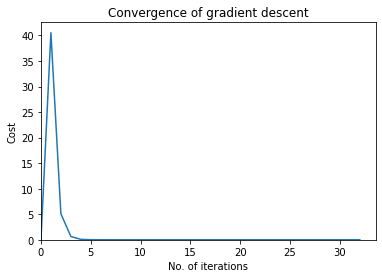

In [22]:
#Plot the cost function
plt.title('Convergence of gradient descent')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(training_output[2])
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

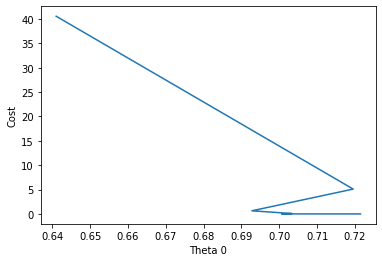

In [23]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 0')
plt.ylabel('Cost')
plt.plot(training_output[0][1:],training_output[2][1:])

plt.show()

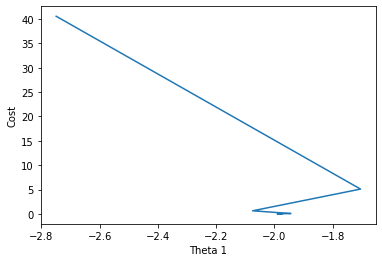

In [24]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 1')
plt.ylabel('Cost')
plt.plot(training_output[1][1:],training_output[2][1:])

plt.show()

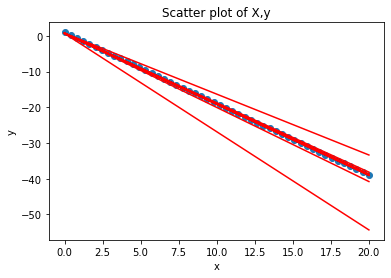

In [25]:
plt.scatter(X, y)
for i in range(1,len(training_output[3])):
    plt.plot(X, training_output[3][i], c='red')
plt.title('Scatter plot of X,y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

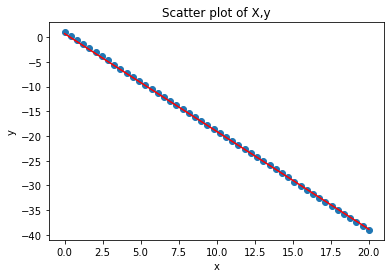

In [26]:
plt.scatter(X, y)
plt.plot(X, y_predicted, c='red')
plt.title('Scatter plot of X,y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [27]:
theta_0 = np.random.random()
theta_1 = np.random.random()
learning_rate = 0.001

In [28]:
def training(X, y, theta_0, theta_1, learning_rate, iters,size_btach):
    cost_history = [0]
    t0_history = [0]
    t1_history = [0]
    y_predicted_history = [0]
    flag = False
    for i in range(iters):  
        for j in range(len(X)//size_btach):
            theta_0,theta_1 = batch_gradient_descent(X[j*size_btach:j*size_btach + size_btach], y[j*size_btach:j*size_btach + size_btach], theta_0, theta_1, learning_rate)
            t0_history.append(theta_0)
            t1_history.append(theta_1)
            cost = cost_function(X, y, theta_0, theta_1)
            cost_history.append(cost)
            y_predicted = hypothesis(theta_0,theta_1,X)
            y_predicted_history.append(y_predicted)
            if(cost < 0.01):
                flag = True
                break;
        if flag:
            break
        print("iter={}, theta_0={}, theta_1={}, cost= {}".format(i, theta_0, theta_1, cost))
    return t0_history, t1_history, cost_history, y_predicted_history

training_output = training(X, y, theta_0, theta_1, 0.001, 1000,5)

iter=0, theta_0=0.05056498338024386, theta_1=-1.5236153716044862, cost= 11.211621087693718
iter=1, theta_0=0.02549689496285763, theta_1=-1.8508178380433637, cost= 0.5198708519036368
iter=2, theta_0=0.022257392517585572, theta_1=-1.9195689037295183, cost= 0.12725941179045344
iter=3, theta_0=0.023590658547439275, theta_1=-1.9341156798674328, cost= 0.12572274082919857
iter=4, theta_0=0.025877714651182524, theta_1=-1.937294079075745, cost= 0.12843511676786773
iter=5, theta_0=0.0283595809134661, theta_1=-1.9380879030776423, cost= 0.12862766664390007
iter=6, theta_0=0.030877093175347616, theta_1=-1.9383812887502225, cost= 0.12814583214573405
iter=7, theta_0=0.03339688414927802, theta_1=-1.938569389280834, cost= 0.12751907979445432
iter=8, theta_0=0.035911969376044836, theta_1=-1.9387350793917164, cost= 0.12686445885187878
iter=9, theta_0=0.03842089752397944, theta_1=-1.9388957409168597, cost= 0.12620671700583755
iter=10, theta_0=0.040923377666527115, theta_1=-1.9390550201322792, cost= 0.1255

In [29]:
for i in range(len(training_output[3])):
    print("iter={}, hypothesis_output = {}".format(i, training_output[3][i]))

iter=0, hypothesis_output = 0
iter=1, hypothesis_output = [0.17889796 0.19299975 0.20710155 0.22120335 0.23530514 0.24940694
 0.26350873 0.27761053 0.29171232 0.30581412 0.31991592 0.33401771
 0.34811951 0.3622213  0.3763231  0.39042489 0.40452669 0.41862849
 0.43273028 0.44683208 0.46093387 0.47503567 0.48913746 0.50323926
 0.51734105 0.53144285 0.54554465 0.55964644 0.57374824 0.58785003
 0.60195183 0.61605362 0.63015542 0.64425722 0.65835901 0.67246081
 0.6865626  0.7006644  0.71476619 0.72886799 0.74296978 0.75707158
 0.77117338 0.78527517 0.79937697 0.81347876 0.82758056 0.84168235
 0.85578415 0.86988595]
iter=2, hypothesis_output = [0.17390606 0.18190971 0.18991336 0.19791701 0.20592066 0.2139243
 0.22192795 0.2299316  0.23793525 0.2459389  0.25394254 0.26194619
 0.26994984 0.27795349 0.28595714 0.29396079 0.30196443 0.30996808
 0.31797173 0.32597538 0.33397903 0.34198267 0.34998632 0.35798997
 0.36599362 0.37399727 0.38200091 0.39000456 0.39800821 0.40601186
 0.41401551 0.422019

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
last_theta_0 = training_output[0][-1]
last_theta_1 = training_output[1][-1]
print('optimum value of Theta_0: ',last_theta_0)
print('optimum value of Theta_1: ',last_theta_1)

y_predicted = hypothesis(last_theta_0,last_theta_1,X)
print('Best regression line: ',y_predicted)

optimum value of Theta_0:  0.7219421109465496
optimum value of Theta_1:  -1.9795274404645644
Best regression line:  [  0.72194211  -0.08602827  -0.89399866  -1.70196904  -2.50993942
  -3.31790981  -4.12588019  -4.93385058  -5.74182096  -6.54979134
  -7.35776173  -8.16573211  -8.9737025   -9.78167288 -10.58964326
 -11.39761365 -12.20558403 -13.01355441 -13.8215248  -14.62949518
 -15.43746557 -16.24543595 -17.05340633 -17.86137672 -18.6693471
 -19.47731749 -20.28528787 -21.09325825 -21.90122864 -22.70919902
 -23.5171694  -24.32513979 -25.13311017 -25.94108056 -26.74905094
 -27.55702132 -28.36499171 -29.17296209 -29.98093248 -30.78890286
 -31.59687324 -32.40484363 -33.21281401 -34.0207844  -34.82875478
 -35.63672516 -36.44469555 -37.25266593 -38.06063631 -38.8686067 ]


In [31]:
from sklearn.metrics import r2_score 

R_square = r2_score(y, y_predicted) 
print('Coefficient of Determination', R_square) 

Coefficient of Determination 0.999856468041273


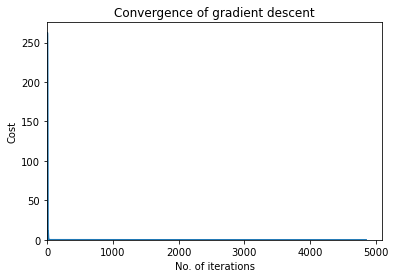

In [32]:
#Plot the cost function
plt.title('Convergence of gradient descent')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(training_output[2])
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

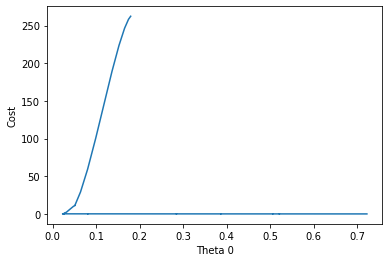

In [33]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 0')
plt.ylabel('Cost')
plt.plot(training_output[0][1:],training_output[2][1:])

plt.show()

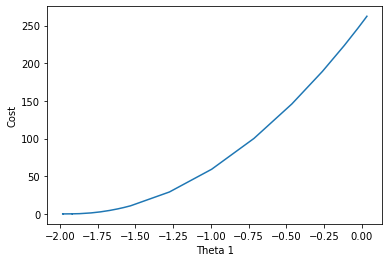

In [34]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 1')
plt.ylabel('Cost')
plt.plot(training_output[1][1:],training_output[2][1:])

plt.show()

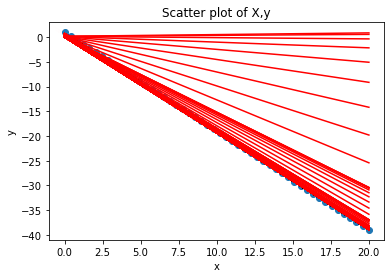

In [35]:
plt.scatter(X, y)
for i in range(1,len(training_output[3])):
    plt.plot(X, training_output[3][i], c='red')
plt.title('Scatter plot of X,y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

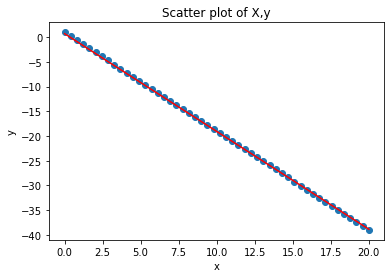

In [36]:
plt.scatter(X, y)
plt.plot(X, y_predicted, c='red')
plt.title('Scatter plot of X,y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [37]:
theta_0 = np.random.random()
theta_1 = np.random.random()
learning_rate = 0.001

In [38]:
training_output = training(X, y, theta_0, theta_1, 0.001, 1000,1)

iter=0, theta_0=-0.10161214111569947, theta_1=-1.941851503174782, cost= 0.19392043451789728
iter=1, theta_0=-0.08945662255790311, theta_1=-1.9433771522961223, cost= 0.19250067980071323
iter=2, theta_0=-0.07732329422353004, theta_1=-1.9440081185754878, cost= 0.18823792586184596
iter=3, theta_0=-0.06532505036797738, theta_1=-1.9446317052040216, cost= 0.18406842983185284
iter=4, theta_0=-0.05346043198672467, theta_1=-1.9452483467520723, cost= 0.17999128826264826
iter=5, theta_0=-0.04172795089941474, theta_1=-1.9458581207091432, cost= 0.17600445595156827
iter=6, theta_0=-0.03012613548144041, theta_1=-1.9464611035602537, cost= 0.17210593253604767
iter=7, theta_0=-0.018653530497799244, theta_1=-1.9470573709385455, cost= 0.1682937619616478
iter=8, theta_0=-0.007308696920568577, theta_1=-1.9476469976348274, cost= 0.1645660315008114
iter=9, theta_0=0.0039097882515943885, theta_1=-1.9482300576069564, cost= 0.16092087079316517
iter=10, theta_0=0.015003332171941667, theta_1=-1.9488066239891149, co

In [39]:
for i in range(len(training_output[3])):
    print("iter={}, hypothesis_output = {}".format(i, training_output[3][i]))

iter=0, hypothesis_output = 0
iter=1, hypothesis_output = [0.17190344 0.28191224 0.39192104 0.50192983 0.61193863 0.72194743
 0.83195623 0.94196503 1.05197383 1.16198263 1.27199143 1.38200023
 1.49200903 1.60201783 1.71202662 1.82203542 1.93204422 2.04205302
 2.15206182 2.26207062 2.37207942 2.48208822 2.59209702 2.70210582
 2.81211462 2.92212342 3.03213221 3.14214101 3.25214981 3.36215861
 3.47216741 3.58217621 3.69218501 3.80219381 3.91220261 4.02221141
 4.13222021 4.242229   4.3522378  4.4622466  4.5722554  4.6822642
 4.792273   4.9022818  5.0122906  5.1222994  5.2323082  5.342317
 5.4523258  5.56233459]
iter=2, hypothesis_output = [0.1718052  0.28179763 0.39179006 0.5017825  0.61177493 0.72176736
 0.8317598  0.94175223 1.05174466 1.16173709 1.27172953 1.38172196
 1.49171439 1.60170682 1.71169926 1.82169169 1.93168412 2.04167656
 2.15166899 2.26166142 2.37165385 2.48164629 2.59163872 2.70163115
 2.81162359 2.92161602 3.03160845 3.14160088 3.25159332 3.36158575
 3.47157818 3.58157062

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




iter=4809, hypothesis_output = [  0.62289591  -0.18340673  -0.98970938  -1.79601202  -2.60231466
  -3.40861731  -4.21491995  -5.0212226   -5.82752524  -6.63382789
  -7.44013053  -8.24643318  -9.05273582  -9.85903847 -10.66534111
 -11.47164376 -12.2779464  -13.08424904 -13.89055169 -14.69685433
 -15.50315698 -16.30945962 -17.11576227 -17.92206491 -18.72836756
 -19.5346702  -20.34097285 -21.14727549 -21.95357814 -22.75988078
 -23.56618342 -24.37248607 -25.17878871 -25.98509136 -26.791394
 -27.59769665 -28.40399929 -29.21030194 -30.01660458 -30.82290723
 -31.62920987 -32.43551252 -33.24181516 -34.0481178  -34.85442045
 -35.66072309 -36.46702574 -37.27332838 -38.07963103 -38.88593367]
iter=4810, hypothesis_output = [  0.6231828   -0.18268969  -0.98856218  -1.79443467  -2.60030716
  -3.40617965  -4.21205214  -5.01792463  -5.82379712  -6.62966961
  -7.4355421   -8.24141459  -9.04728708  -9.85315957 -10.65903206
 -11.46490455 -12.27077704 -13.07664953 -13.88252202 -14.68839451
 -15.494267   

In [40]:
last_theta_0 = training_output[0][-1]
last_theta_1 = training_output[1][-1]
print('optimum value of Theta_0: ',last_theta_0)
print('optimum value of Theta_1: ',last_theta_1)

y_predicted = hypothesis(last_theta_0,last_theta_1,X)
print('Best regression line: ',y_predicted)

optimum value of Theta_0:  0.7219037179476688
optimum value of Theta_1:  -1.9793984818846149
Best regression line:  [  0.72190372  -0.08601403  -0.89393178  -1.70184953  -2.50976727
  -3.31768502  -4.12560277  -4.93352052  -5.74143826  -6.54935601
  -7.35727376  -8.16519151  -8.97310925  -9.781027   -10.58894475
 -11.3968625  -12.20478025 -13.01269799 -13.82061574 -14.62853349
 -15.43645124 -16.24436898 -17.05228673 -17.86020448 -18.66812223
 -19.47603997 -20.28395772 -21.09187547 -21.89979322 -22.70771097
 -23.51562871 -24.32354646 -25.13146421 -25.93938196 -26.7472997
 -27.55521745 -28.3631352  -29.17105295 -29.97897069 -30.78688844
 -31.59480619 -32.40272394 -33.21064169 -34.01855943 -34.82647718
 -35.63439493 -36.44231268 -37.25023042 -38.05814817 -38.86606592]


In [41]:
from sklearn.metrics import r2_score 

R_square = r2_score(y, y_predicted) 
print('Coefficient of Determination', R_square) 

Coefficient of Determination 0.9998564548672133


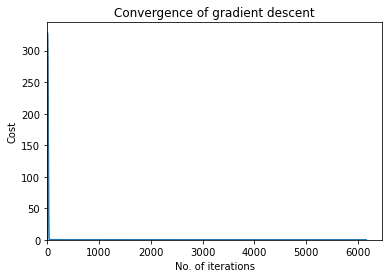

In [42]:
#Plot the cost function
plt.title('Convergence of gradient descent')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(training_output[2])
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

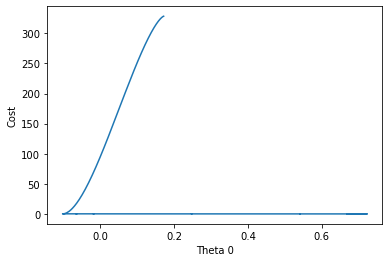

In [43]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 0')
plt.ylabel('Cost')
plt.plot(training_output[0][1:],training_output[2][1:])

plt.show()

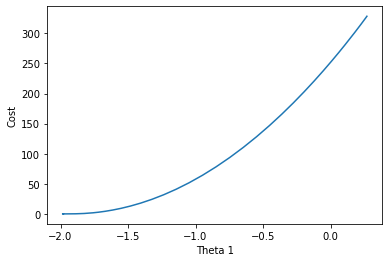

In [44]:
#Plot the cost function
#plt.title('Convergence of gradient descent')
plt.xlabel('Theta 1')
plt.ylabel('Cost')
plt.plot(training_output[1][1:],training_output[2][1:])

plt.show()

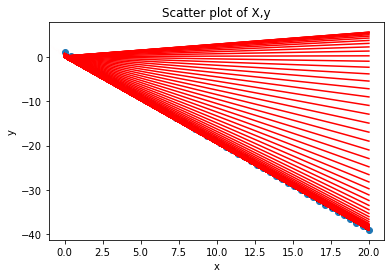

In [45]:
plt.scatter(X, y)
for i in range(1,len(training_output[3])):
    plt.plot(X, training_output[3][i], c='red')
plt.title('Scatter plot of X,y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

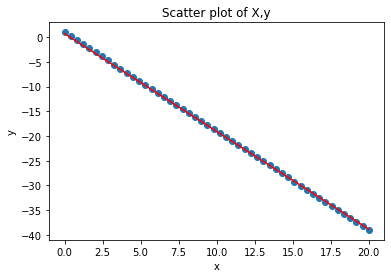

In [46]:
plt.scatter(X, y)
plt.plot(X, y_predicted, c='red')
plt.title('Scatter plot of X,y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()